In [39]:
import yfinance as yf

google_stock = yf.download('GOOGL', start='2024-08-19', end='2024-09-16')
google_stock.to_csv('google_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

google_stock = pd.read_csv('google_stock_data.csv')
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-08-19,165.279999,166.690002,164.259995,166.669998,166.449127,22416200
1,2024-08-20,166.899994,168.639999,166.820007,167.179993,166.958450,18341500
2,2024-08-21,165.149994,166.850006,164.669998,165.850006,165.630219,22902000
3,2024-08-22,167.259995,167.589996,163.309998,163.800003,163.582932,22493300
4,2024-08-23,164.720001,166.179993,163.830002,165.619995,165.400513,13955700


In [23]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       269 non-null    object 
 1   Open       269 non-null    float64
 2   High       269 non-null    float64
 3   Low        269 non-null    float64
 4   Close      269 non-null    float64
 5   Adj Close  269 non-null    float64
 6   Volume     269 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.8+ KB


In [24]:
google_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,269.000000,269.000000,269.000000,269.000000,269.000000,2.690000e+02
mean,150.954981,152.522156,149.548476,151.071078,150.750441,2.781003e+07
std,17.658945,17.797210,17.503333,17.608828,17.623278,1.057392e+07
min,122.879997,123.309998,120.209999,122.169998,121.868233,1.024210e+07
25%,136.259995,137.869995,135.149994,136.410004,136.073074,2.132020e+07
50%,145.889999,146.669998,145.100006,145.990005,145.629410,2.520890e+07
75%,165.839996,167.589996,164.059998,166.160004,165.939804,3.084810e+07
max,190.309998,191.750000,189.029999,191.179993,190.926636,8.436620e+07


In [41]:
google_stock.shape

(19, 7)

In [26]:
google_stock.duplicated().sum()

np.int64(0)

In [28]:
google_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
google_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [42]:
# Prepare the dataset for Linear Regression
X = google_stock[['Open']]  # Using only open since that's what everyone will know
y = google_stock['Adj Close']                  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  
print(f'R-squared: {r2}')

# Calculate Adjusted R^2
n = len(y_test)  # Number of observations
p = X.shape[1]   # Number of predictors (features)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj}")

Mean Squared Error: 3.7252362331153392
The difference between actual and predicted values 1.9300871050590798
R-squared: 0.810535186106307
Adjusted R^2: 0.7158027791594606


In [43]:
joblib.dump(model, 'google_stock_prediction_model.pkl')

print("Model saved as google_stock_prediction_model.pkl")

Model saved as google_stock_prediction_model.pkl


In [32]:
print(f'Intercept: {model.intercept_}')


Intercept: 1.5243361659971413


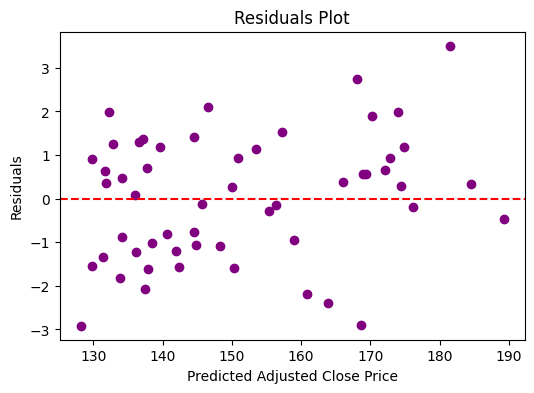

In [33]:

# Residuals Plot (Error plot)
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Adjusted Close Price')
plt.ylabel('Residuals')
plt.show()


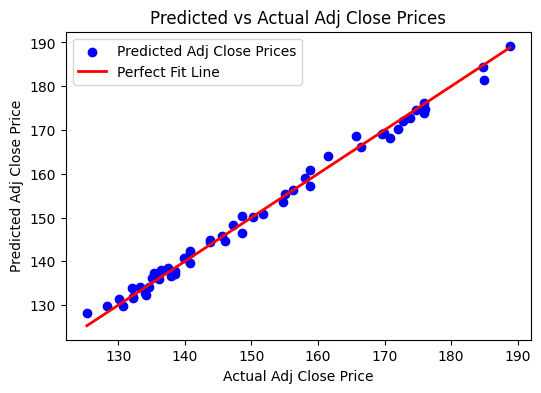

In [34]:
# Predicted vs. Actual Close Prices Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Adj Close Prices')  # Points where the x-axis is actual and y-axis is predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit Line')  # Line representing perfect prediction
plt.title('Predicted vs Actual Adj Close Prices')
plt.xlabel('Actual Adj Close Price')
plt.ylabel('Predicted Adj Close Price')
plt.legend()
plt.show()

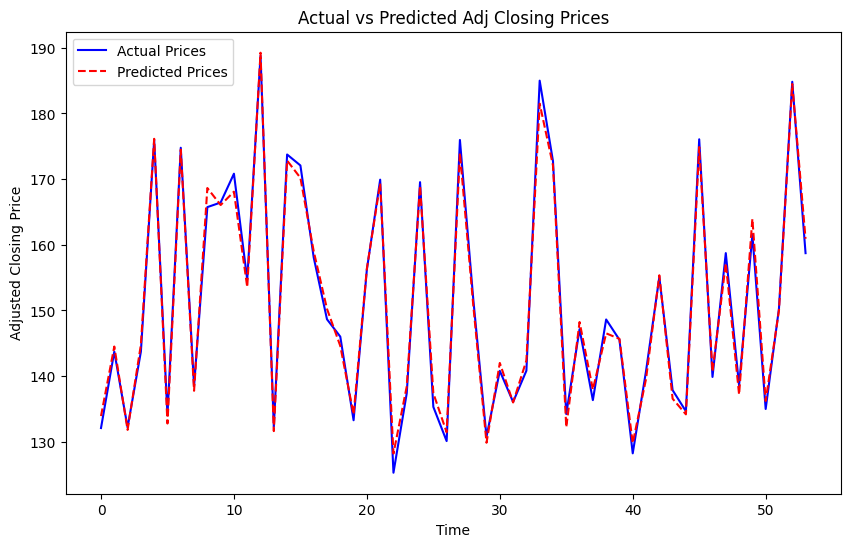

In [35]:
# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Adj Closing Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()